In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import COLOR_COLUMNS, BAND_CALIB_COLUMNS, BAND_PAIRS, COLOR_PAIRS, process_kids, clean_sdss, describe_column, \
                  cut_u_g, cut_r, number_count_analysis, qso_catalogs_report
from utils_plotting import plot_class_histograms

In [3]:
sns.set(style='ticks')

# KIDS magnitudes

In [4]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='r')

Data shape: (91317, 44)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Cleaning SDSS: 33821 left
Removing R > 22: 33587 left


In [5]:
catalog = pd.read_csv('catalogs/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-all_cut-r__2018-04-10_14:49:52.csv')
catalog.shape

(2692201, 18)

In [6]:
catalog['train'] = catalog['ID'].isin(kids_x_sdss['ID'])

In [7]:
qso_kids_sdss = kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'QSO']
qso_catalog = catalog.loc[catalog['CLASS'] == 'QSO']

In [8]:
catalog_sampled = catalog.sample(n=500000, random_state=1567)
qso_catalog_sampled = qso_catalog.sample(n=100000, random_state=1567)

In [9]:
catalog_north = catalog.loc[catalog['DECJ2000'] > -15]
catalog_south = catalog.loc[catalog['DECJ2000'] < -15]

In [10]:
kids_x_sdss_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] >= 0.8]
kids_x_sdss_non_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] <= 0.8]

catalog_star = catalog.loc[catalog['CLASS_STAR'] >= 0.8]
catalog_non_star = catalog.loc[catalog['CLASS_STAR'] <= 0.8]

In [11]:
describe_column(kids_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([17107,  6084, 10396]),
 array([50.93339685, 18.11415131, 30.95245184]))

In [12]:
describe_column(catalog['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1374735,  295530, 1021936]),
 array([51.06360929, 10.97726358, 37.95912712]))

In [13]:
describe_column(catalog_north['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([907249, 188830, 723830]),
 array([49.85133872, 10.37579351, 39.77286776]))

In [14]:
describe_column(catalog_south['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([467486, 106700, 298106]),
 array([53.59283359, 12.23214245, 34.17502396]))

In [15]:
describe_column(catalog_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([ 91778, 118056, 908103]),
 array([ 8.20958605, 10.56016573, 81.23024822]))

In [16]:
describe_column(catalog_non_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1282957,  177474,  113833]),
 array([81.49567036, 11.27345858,  7.23087106]))

# Photo catalogs

In [34]:
qso_catalogs_report(catalog)

Catalog size: 2692201
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([1374735,  295530, 1021936]), array([51.06360929, 10.97726358, 37.95912712]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog size: 19930
Intersection size: 15005, train elements: 3035
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  672, 13012,  1321]), array([ 4.47850716, 86.71776075,  8.80373209]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog size: 22368
Intersection size: 15990, train elements: 3430
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 1071, 14133,   786]), array([ 6.69793621, 88.38649156,  4.91557223]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog size: 70749
Intersection size: 37377, train elements: 5899
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 4397, 28017,  4963]), array([11.76391899, 74.95786179, 13.27821923]))


# Standalone bands

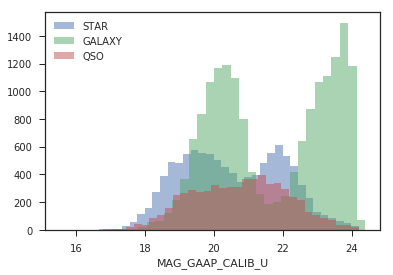

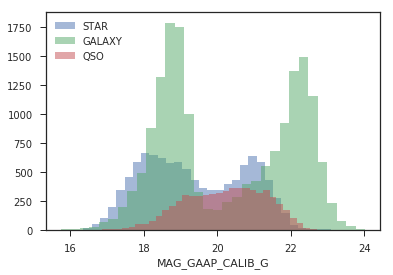

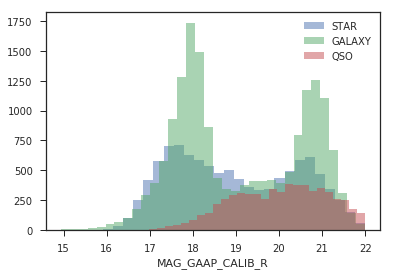

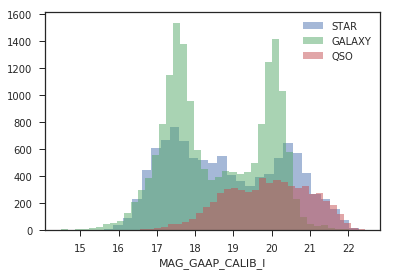

In [14]:
plot_class_histograms(kids_x_sdss, BAND_CALIB_COLUMNS)

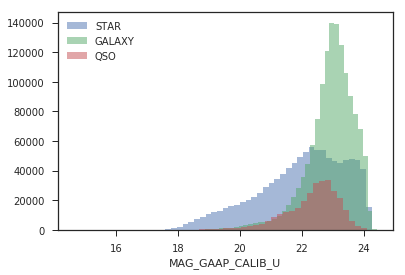

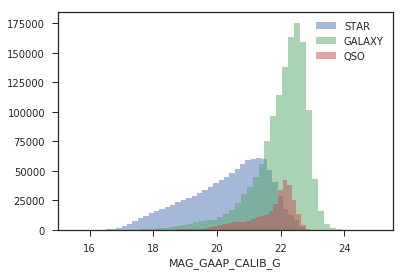

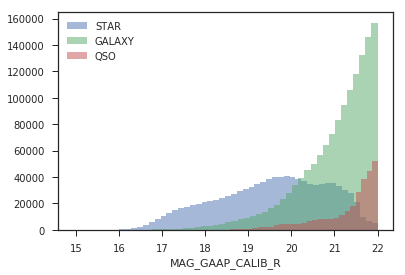

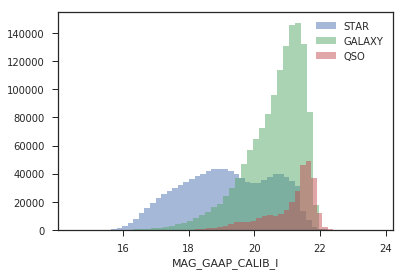

In [15]:
plot_class_histograms(catalog, BAND_CALIB_COLUMNS)

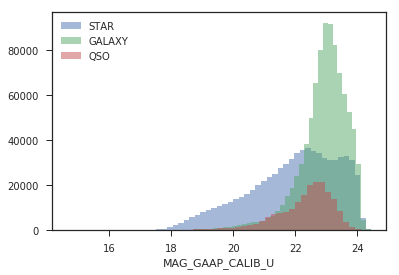

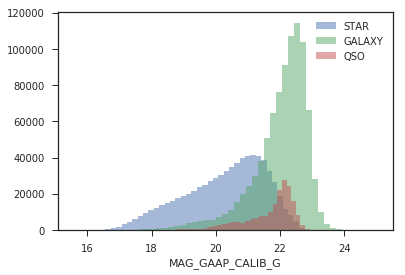

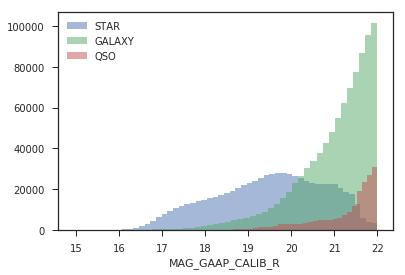

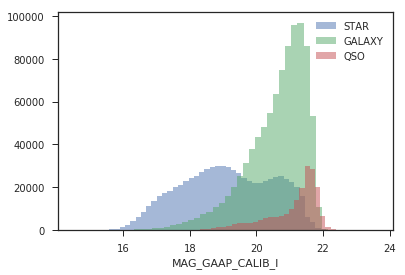

In [16]:
plot_class_histograms(catalog_north, BAND_CALIB_COLUMNS)

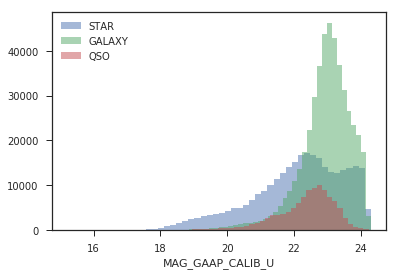

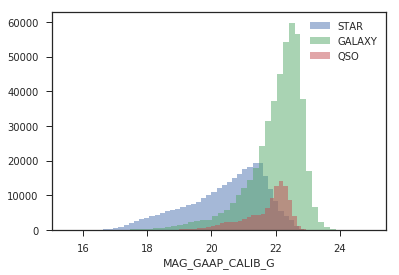

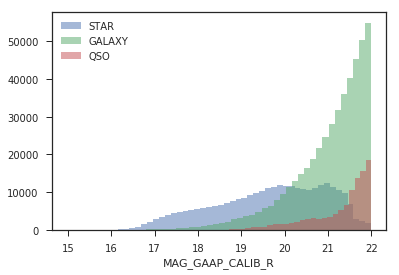

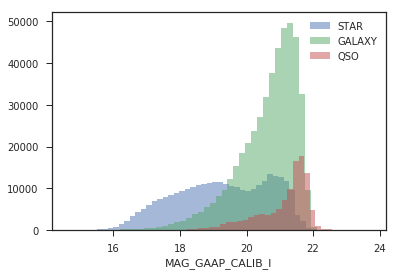

In [17]:
plot_class_histograms(catalog_south, BAND_CALIB_COLUMNS)

# Paired bands

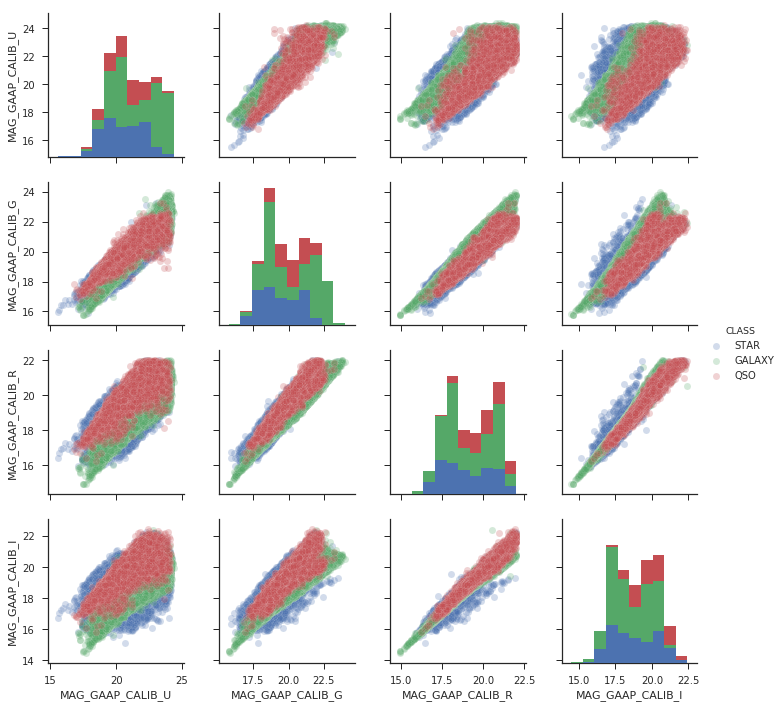

In [18]:
sns.pairplot(kids_x_sdss[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

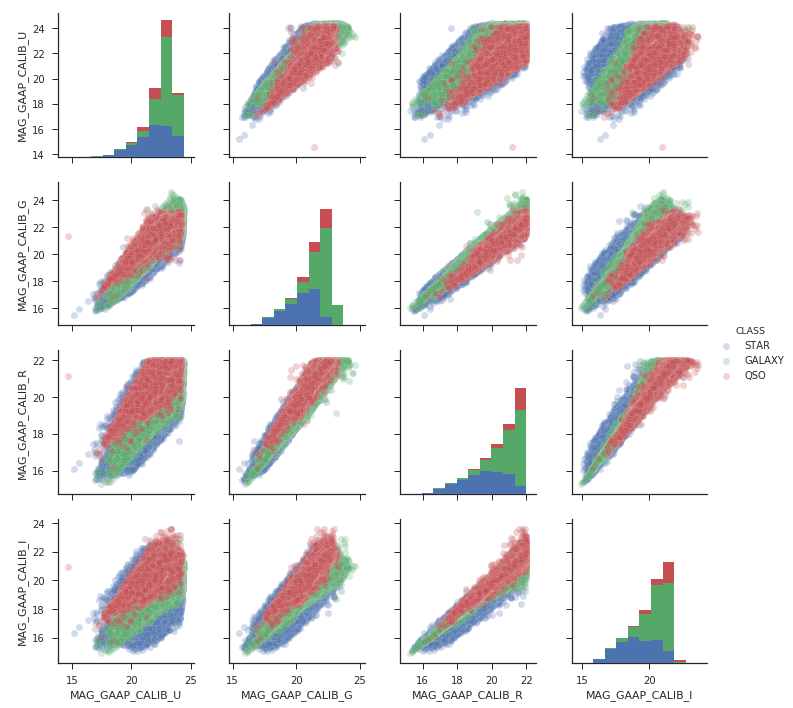

In [19]:
sns.pairplot(catalog_sampled[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

# Standalone colors

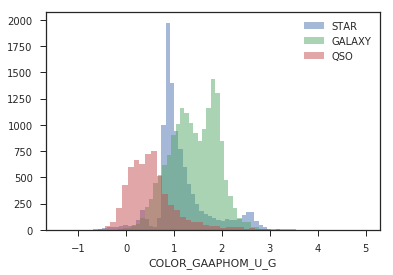

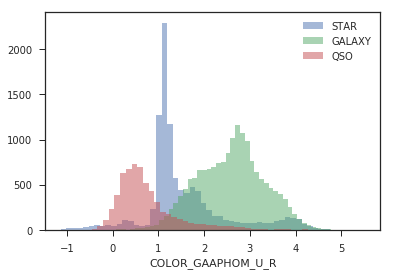

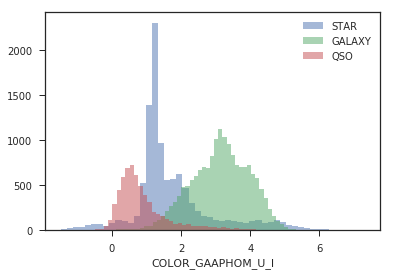

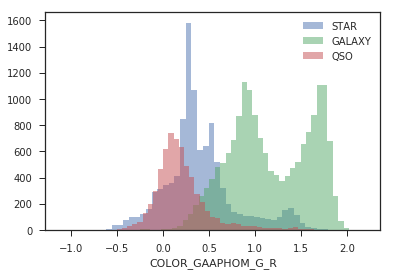

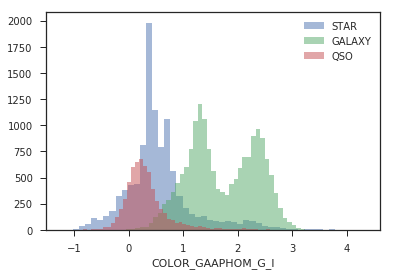

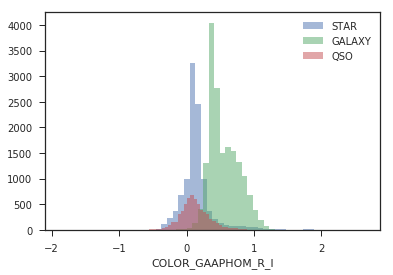

In [20]:
plot_class_histograms(kids_x_sdss, COLOR_COLUMNS)

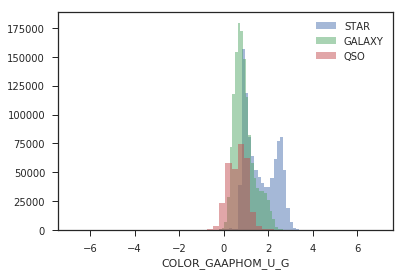

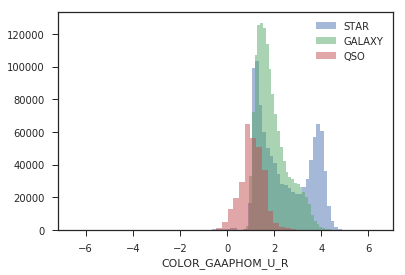

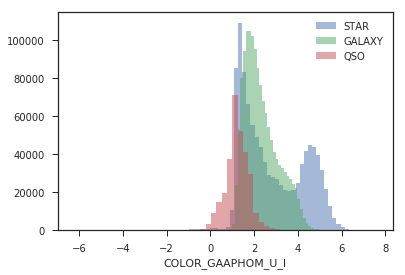

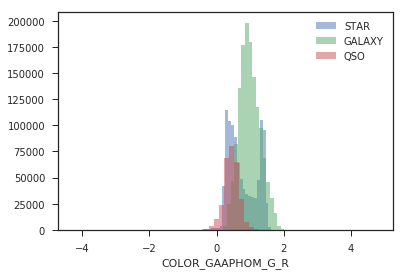

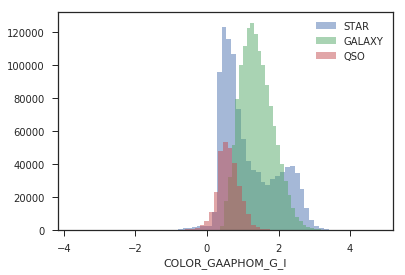

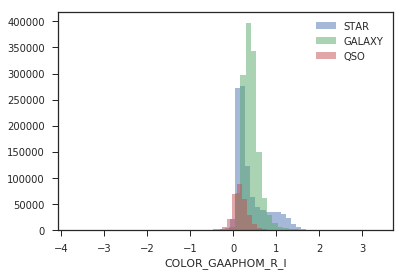

In [21]:
plot_class_histograms(catalog, COLOR_COLUMNS)

# Paired colors

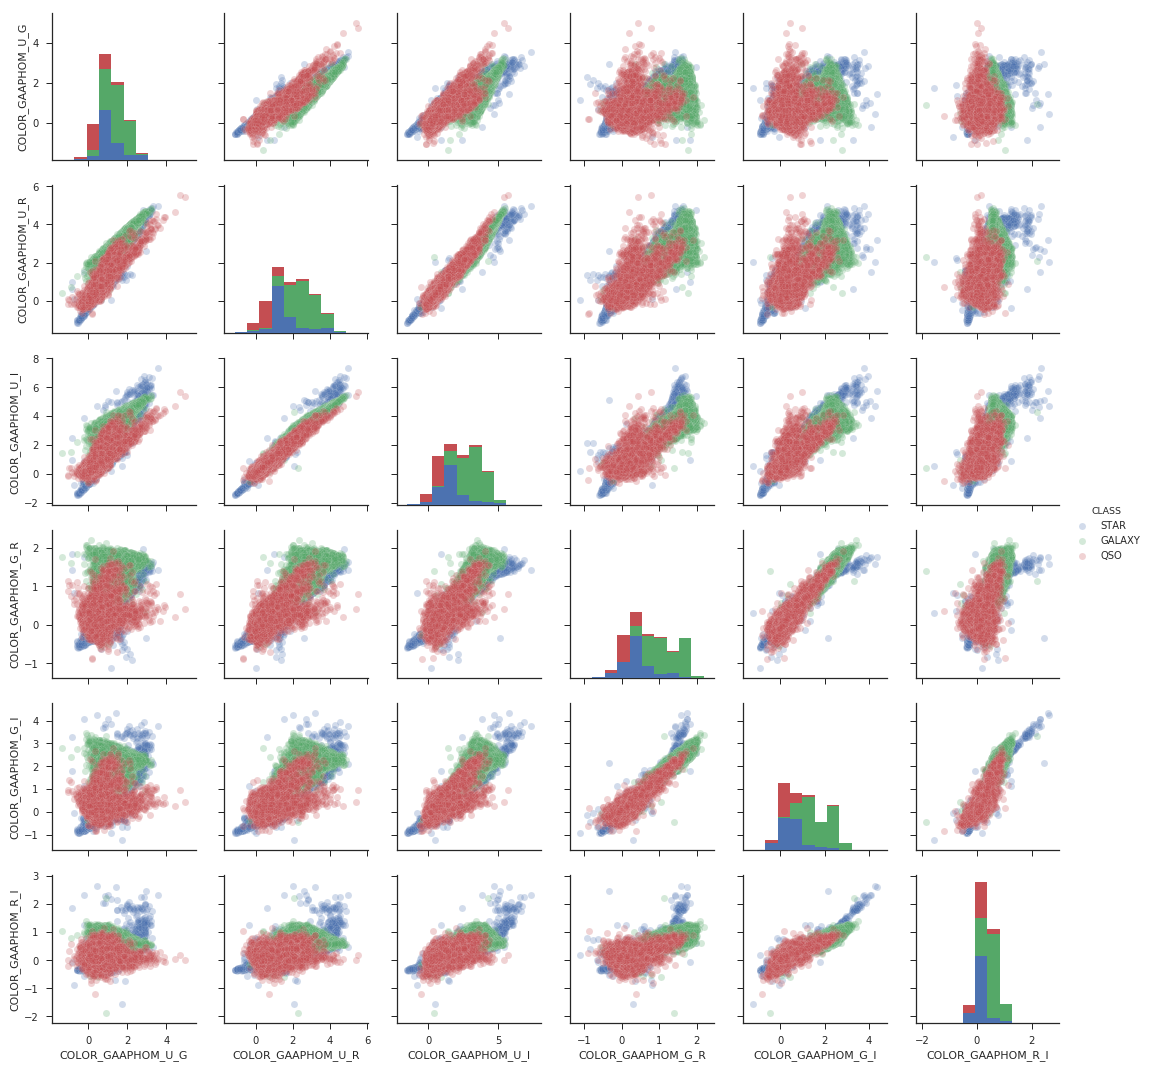

In [22]:
sns.pairplot(kids_x_sdss[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

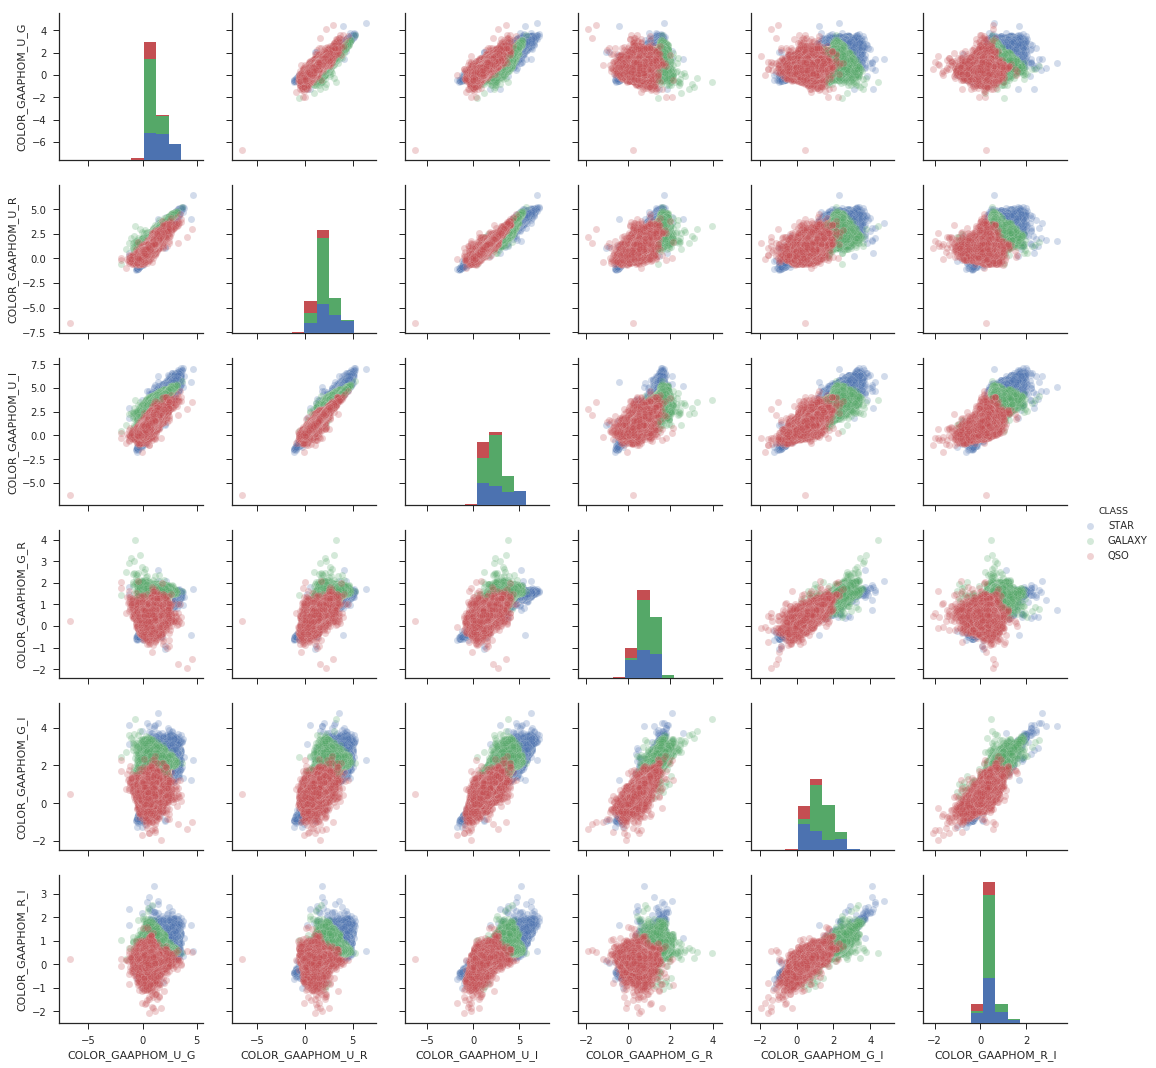

In [23]:
sns.pairplot(catalog_sampled[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

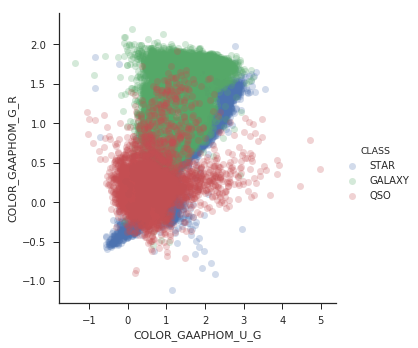

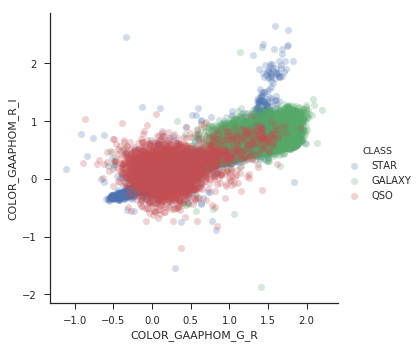

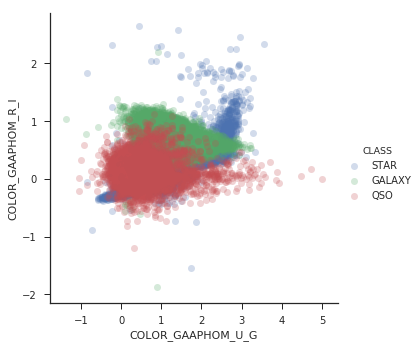

In [24]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss, fit_reg=False, scatter_kws={'alpha': 0.25})

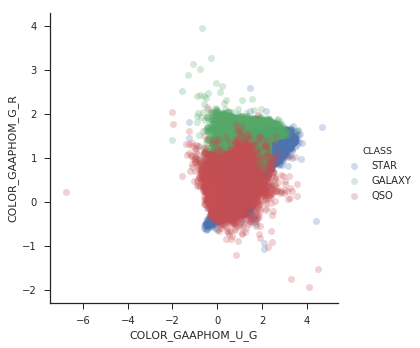

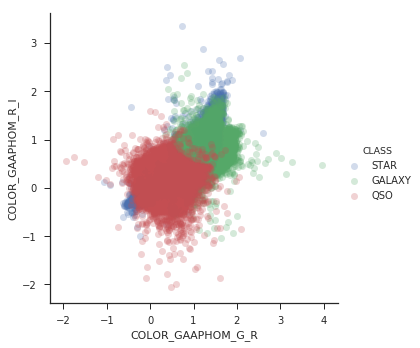

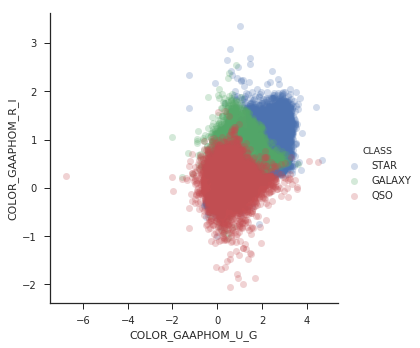

In [25]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_sampled, fit_reg=False, scatter_kws={'alpha': 0.25})

# QSO color pairs

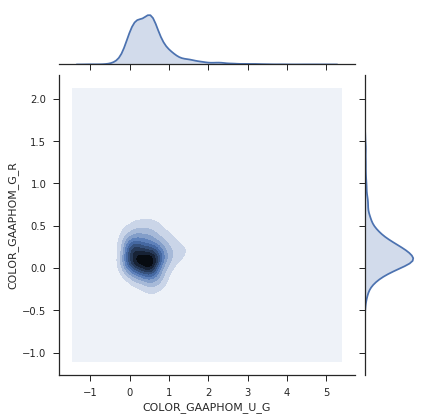

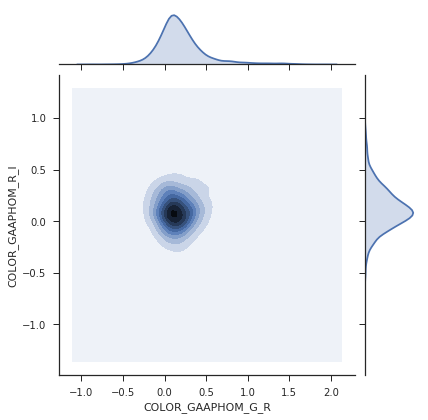

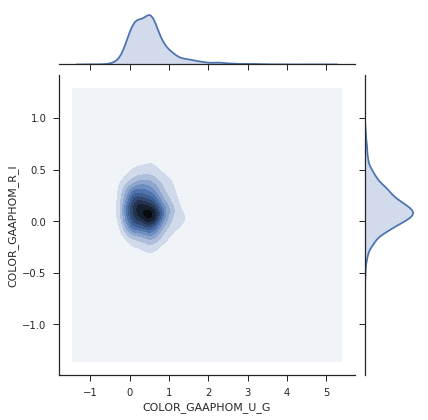

In [26]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_sdss[b_1], qso_kids_sdss[b_2], kind='kde', stat_func=None)

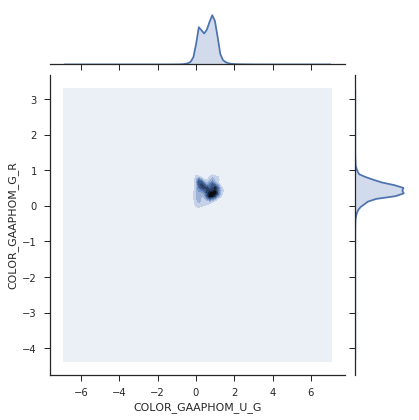

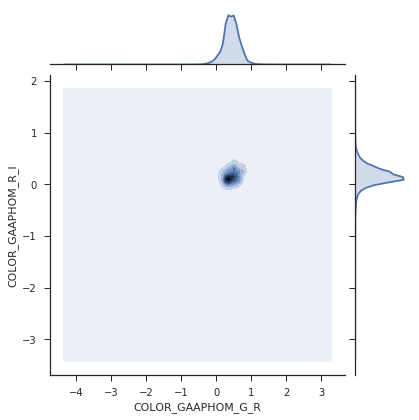

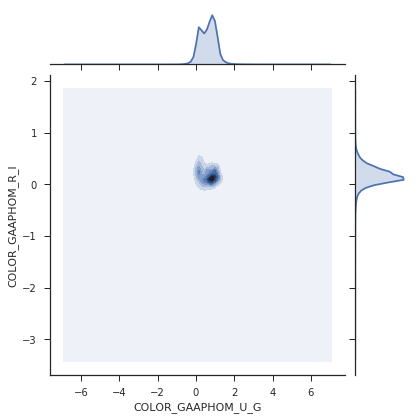

In [27]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_catalog_sampled[b_1], qso_catalog_sampled[b_2], kind='kde', stat_func=None)

# Number counts analysis

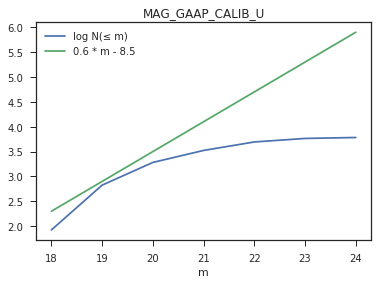

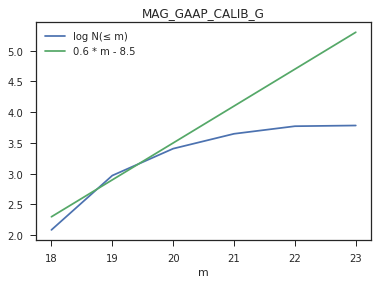

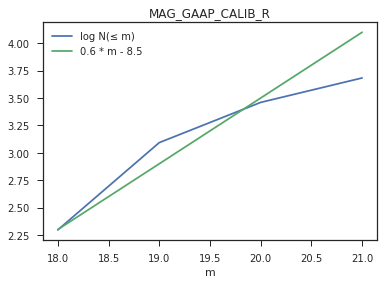

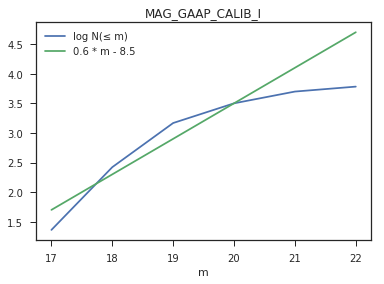

In [28]:
number_count_analysis(qso_kids_sdss, c=8.5)

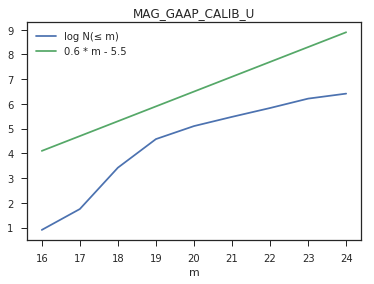

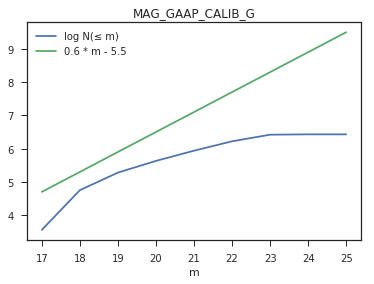

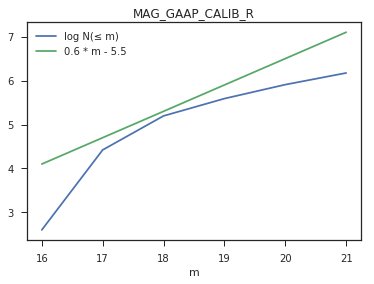

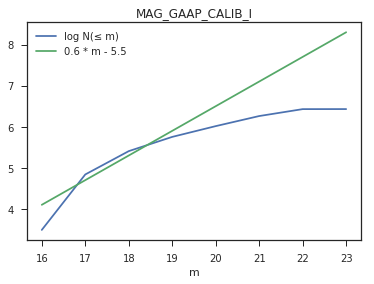

In [29]:
number_count_analysis(catalog, c=5.5)

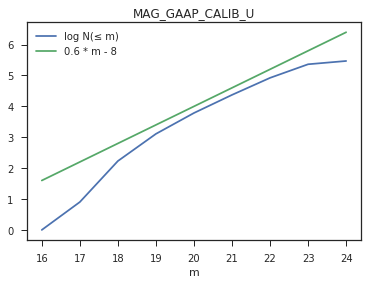

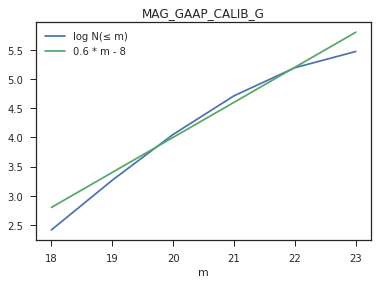

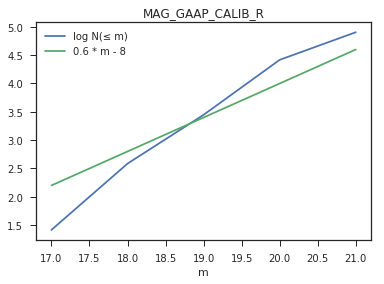

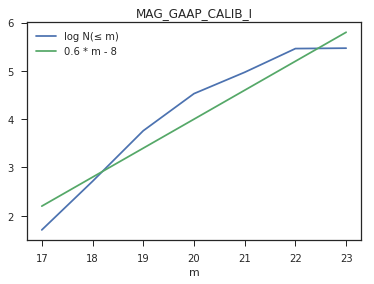

In [30]:
number_count_analysis(qso_catalog, c=8)

# Predictions

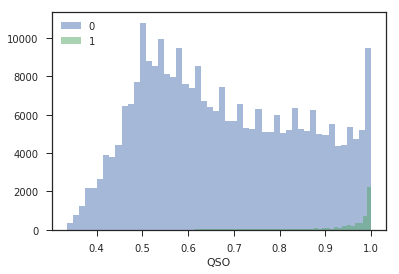

In [31]:
for t in [0, 1]:
    sns.distplot(qso_catalog.loc[qso_catalog['train'] == t]['QSO'], label=str(t), kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()

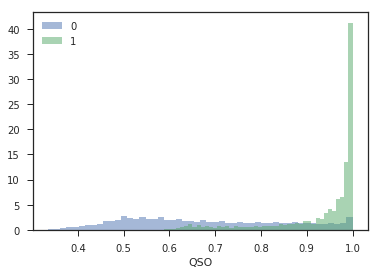

In [32]:
for t in [0, 1]:
    sns.distplot(qso_catalog.loc[qso_catalog['train'] == t]['QSO'], label=str(t), norm_hist=True, kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()

# What about not point sources!?

## CLASS_STAR

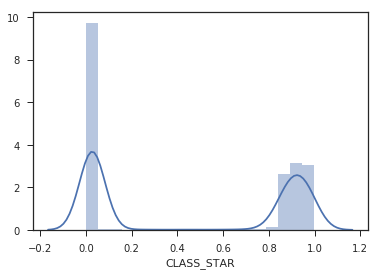

In [17]:
sns.distplot(kids_x_sdss['CLASS_STAR'])

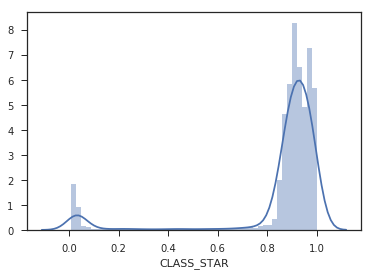

In [18]:
sns.distplot(qso_kids_sdss['CLASS_STAR'])

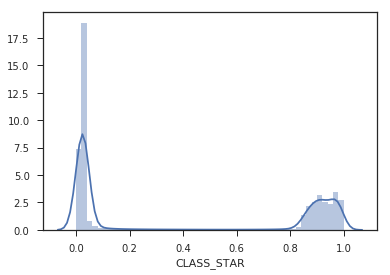

In [26]:
sns.distplot(catalog['CLASS_STAR'])

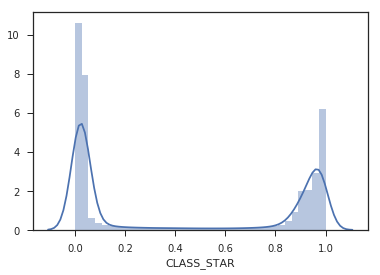

In [27]:
sns.distplot(qso_catalog['CLASS_STAR'])

## Color-color plots

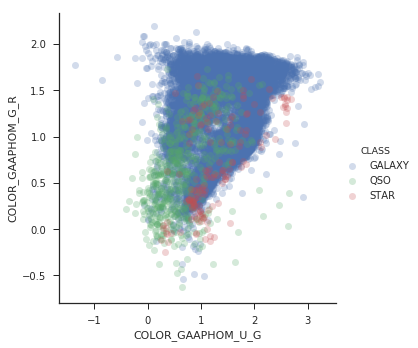

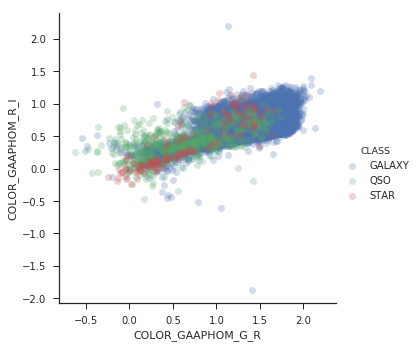

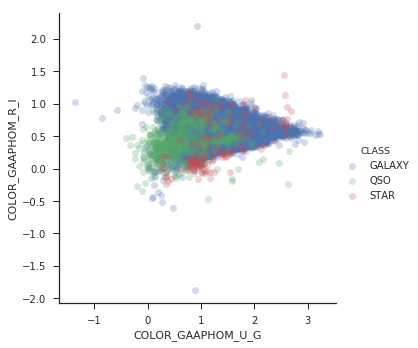

In [32]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

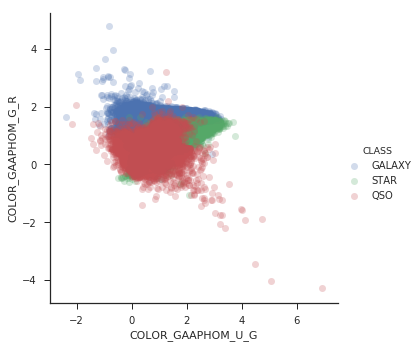

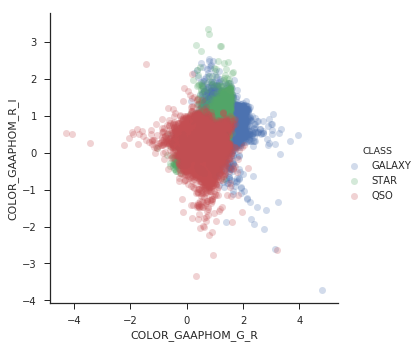

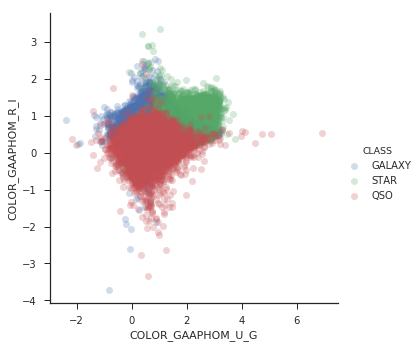

In [33]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

## Other QSO catalogs

In [17]:
qso_catalogs_report(catalog_star)

Catalog size: 1117937
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 91778, 118056, 908103]), array([ 8.20958605, 10.56016573, 81.23024822]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog size: 19930
Intersection size: 13459, train elements: 2928
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  225, 11962,  1272]), array([ 1.67174381, 88.87733115,  9.45092503]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog size: 22368
Intersection size: 14838, train elements: 3303
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  788, 13291,   759]), array([ 5.31068877, 89.57406659,  5.11524464]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog size: 70749
Intersection size: 31819, train elements: 5645
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 1883, 25234,  4702]), array([ 5.91784783, 79.30481788, 14.7773343 ]))


In [18]:
qso_catalogs_report(catalog_non_star)

Catalog size: 1574264
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([1282957,  177474,  113833]), array([81.49567036, 11.27345858,  7.23087106]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog size: 19930
Intersection size: 1546, train elements: 107
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 447, 1050,   49]), array([28.91332471, 67.91720569,  3.1694696 ]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog size: 22368
Intersection size: 1152, train elements: 127
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([283, 842,  27]), array([24.56597222, 73.09027778,  2.34375   ]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog size: 70749
Intersection size: 5558, train elements: 254
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2514, 2783,  261]), array([45.23209788, 50.07196833,  4.69593379]))
